# Data understanding
1. Importing data and important libraries

In [1]:
# Suppressing Warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#importing dataset
lead_data = pd.read_csv("Leads.csv")
lead_data.head()

Prospect ID  Lead Number              Lead Origin  \
0  7927b2df-8bba-4d29-b9a2-b6e0beafe620       660737                      API   
1  2a272436-5132-4136-86fa-dcc88c88f482       660728                      API   
2  8cc8c611-a219-4f35-ad23-fdfd2656bd8a       660727  Landing Page Submission   
3  0cc2df48-7cf4-4e39-9de9-19797f9b38cc       660719  Landing Page Submission   
4  3256f628-e534-4826-9d63-4a8b88782852       660681  Landing Page Submission   

      Lead Source Do Not Email Do Not Call  Converted  TotalVisits  \
0      Olark Chat           No          No          0          0.0   
1  Organic Search           No          No          0          5.0   
2  Direct Traffic           No          No          1          2.0   
3  Direct Traffic           No          No          0          1.0   
4          Google           No          No          1          2.0   

   Total Time Spent on Website  Page Views Per Visit          ...           \
0                            0                   0.0          ...            
1                          674                   2.5          ...            
2                         1532                   2.0          ...            
3                          305                   1.0          ...            
4                         1428                   1.0          ...            

  Get updates on DM Content    Lead Profile    City  \
0                        No          Select  Select   
1                        No          Select  Select   
2                        No  Potential Lead  Mumbai   
3                        No          Select  Mumbai   
4                        No          Select  Mumbai   

  Asymmetrique Activity Index Asymmetrique Profile Index  \
0                   02.Medium                  02.Medium   
1                   02.Medium                  02.Medium   
2                   02.Medium                    01.High   
3                   02.Medium                    01.High   
4                   02.Medium                    01.High   

  Asymmetrique Activity Score Asymmetrique Profile Score  \
0                        15.0                       15.0   
1                        15.0                       15.0   
2                        14.0                       20.0   
3                        13.0                       17.0   
4                        15.0                       18.0   

  I agree to pay the amount through cheque  \
0                                       No   
1                                       No   
2                                       No   
3                                       No   
4                                       No   

  A free copy of Mastering The Interview Last Notable Activity  
0                                     No              Modified  
1                                     No          Email Opened  
2                                    Yes          Email Opened  
3                                     No              Modified  
4                                     No              Modified  

[5 rows x 37 columns]

# Checking data shape  and columns

In [4]:
lead_data.shape

(9240, 37)

In [5]:
lead_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
Prospect ID                                      9240 non-null object
Lead Number                                      9240 non-null int64
Lead Origin                                      9240 non-null object
Lead Source                                      9204 non-null object
Do Not Email                                     9240 non-null object
Do Not Call                                      9240 non-null object
Converted                                        9240 non-null int64
TotalVisits                                      9103 non-null float64
Total Time Spent on Website                      9240 non-null int64
Page Views Per Visit                             9103 non-null float64
Last Activity                                    9137 non-null object
Country                                          6779 non-null object
Specialization                                   7802 

In [6]:
lead_data.describe()

Lead Number    Converted  TotalVisits  Total Time Spent on Website  \
count    9240.000000  9240.000000  9103.000000                  9240.000000   
mean   617188.435606     0.385390     3.445238                   487.698268   
std     23405.995698     0.486714     4.854853                   548.021466   
min    579533.000000     0.000000     0.000000                     0.000000   
25%    596484.500000     0.000000     1.000000                    12.000000   
50%    615479.000000     0.000000     3.000000                   248.000000   
75%    637387.250000     1.000000     5.000000                   936.000000   
max    660737.000000     1.000000   251.000000                  2272.000000   

       Page Views Per Visit  Asymmetrique Activity Score  \
count           9103.000000                  5022.000000   
mean               2.362820                    14.306252   
std                2.161418                     1.386694   
min                0.000000                     7.000000   
25%                1.000000                    14.000000   
50%                2.000000                    14.000000   
75%                3.000000                    15.000000   
max               55.000000                    18.000000   

       Asymmetrique Profile Score  
count                 5022.000000  
mean                    16.344883  
std                      1.811395  
min                     11.000000  
25%                     15.000000  
50%                     16.000000  
75%                     18.000000  
max                     20.000000

# converting some variable to binary 
Some column has values in yes and no so changing it into 0 and 1 

In [7]:
#apply function binary_map to converting data into binary
varlist = ['Do Not Email','Do Not Call','Search','Newspaper Article','X Education Forums','Newspaper','Digital Advertisement','Through Recommendations','A free copy of Mastering The Interview','I agree to pay the amount through cheque','Get updates on DM Content','Update me on Supply Chain Content','Receive More Updates About Our Courses','Magazine']
def binary_map(x):
    return x.map({'Yes':1,"No":0})
lead_data[varlist] = lead_data[varlist].apply(binary_map)

In [8]:
lead_data.head()

Prospect ID  Lead Number              Lead Origin  \
0  7927b2df-8bba-4d29-b9a2-b6e0beafe620       660737                      API   
1  2a272436-5132-4136-86fa-dcc88c88f482       660728                      API   
2  8cc8c611-a219-4f35-ad23-fdfd2656bd8a       660727  Landing Page Submission   
3  0cc2df48-7cf4-4e39-9de9-19797f9b38cc       660719  Landing Page Submission   
4  3256f628-e534-4826-9d63-4a8b88782852       660681  Landing Page Submission   

      Lead Source  Do Not Email  Do Not Call  Converted  TotalVisits  \
0      Olark Chat             0            0          0          0.0   
1  Organic Search             0            0          0          5.0   
2  Direct Traffic             0            0          1          2.0   
3  Direct Traffic             0            0          0          1.0   
4          Google             0            0          1          2.0   

   Total Time Spent on Website  Page Views Per Visit          ...            \
0                            0                   0.0          ...             
1                          674                   2.5          ...             
2                         1532                   2.0          ...             
3                          305                   1.0          ...             
4                         1428                   1.0          ...             

  Get updates on DM Content    Lead Profile    City  \
0                         0          Select  Select   
1                         0          Select  Select   
2                         0  Potential Lead  Mumbai   
3                         0          Select  Mumbai   
4                         0          Select  Mumbai   

  Asymmetrique Activity Index Asymmetrique Profile Index  \
0                   02.Medium                  02.Medium   
1                   02.Medium                  02.Medium   
2                   02.Medium                    01.High   
3                   02.Medium                    01.High   
4                   02.Medium                    01.High   

  Asymmetrique Activity Score  Asymmetrique Profile Score  \
0                        15.0                        15.0   
1                        15.0                        15.0   
2                        14.0                        20.0   
3                        13.0                        17.0   
4                        15.0                        18.0   

   I agree to pay the amount through cheque  \
0                                         0   
1                                         0   
2                                         0   
3                                         0   
4                                         0   

   A free copy of Mastering The Interview  Last Notable Activity  
0                                       0               Modified  
1                                       0           Email Opened  
2                                       1           Email Opened  
3                                       0               Modified  
4                                       0               Modified  

[5 rows x 37 columns]

In [9]:
#removing numeric tag from both column 
lead_data['Asymmetrique Activity Index'] = lead_data['Asymmetrique Activity Index'].str.split('.',1).str[1]
lead_data['Asymmetrique Profile Index'] = lead_data['Asymmetrique Profile Index'].str.split('.',1).str[1]

In [10]:
lead_data.head()

Prospect ID  Lead Number              Lead Origin  \
0  7927b2df-8bba-4d29-b9a2-b6e0beafe620       660737                      API   
1  2a272436-5132-4136-86fa-dcc88c88f482       660728                      API   
2  8cc8c611-a219-4f35-ad23-fdfd2656bd8a       660727  Landing Page Submission   
3  0cc2df48-7cf4-4e39-9de9-19797f9b38cc       660719  Landing Page Submission   
4  3256f628-e534-4826-9d63-4a8b88782852       660681  Landing Page Submission   

      Lead Source  Do Not Email  Do Not Call  Converted  TotalVisits  \
0      Olark Chat             0            0          0          0.0   
1  Organic Search             0            0          0          5.0   
2  Direct Traffic             0            0          1          2.0   
3  Direct Traffic             0            0          0          1.0   
4          Google             0            0          1          2.0   

   Total Time Spent on Website  Page Views Per Visit          ...            \
0                            0                   0.0          ...             
1                          674                   2.5          ...             
2                         1532                   2.0          ...             
3                          305                   1.0          ...             
4                         1428                   1.0          ...             

  Get updates on DM Content    Lead Profile    City  \
0                         0          Select  Select   
1                         0          Select  Select   
2                         0  Potential Lead  Mumbai   
3                         0          Select  Mumbai   
4                         0          Select  Mumbai   

  Asymmetrique Activity Index Asymmetrique Profile Index  \
0                      Medium                     Medium   
1                      Medium                     Medium   
2                      Medium                       High   
3                      Medium                       High   
4                      Medium                       High   

  Asymmetrique Activity Score  Asymmetrique Profile Score  \
0                        15.0                        15.0   
1                        15.0                        15.0   
2                        14.0                        20.0   
3                        13.0                        17.0   
4                        15.0                        18.0   

   I agree to pay the amount through cheque  \
0                                         0   
1                                         0   
2                                         0   
3                                         0   
4                                         0   

   A free copy of Mastering The Interview  Last Notable Activity  
0                                       0               Modified  
1                                       0           Email Opened  
2                                       1           Email Opened  
3                                       0               Modified  
4                                       0               Modified  

[5 rows x 37 columns]

In [11]:
#changing column into lower case 
lead_data['Prospect ID'] = lead_data['Prospect ID'].str.lower()

In [12]:
#checking duplicate values
sum(lead_data.duplicated(subset = "Prospect ID")) == 0

True

In [13]:
#dropping two columns as its not necessary in model building 
lead_data1 = lead_data.drop(['Prospect ID','Lead Number'],axis = 1)

In [14]:
lead_data1.head()

Lead Origin     Lead Source  Do Not Email  Do Not Call  \
0                      API      Olark Chat             0            0   
1                      API  Organic Search             0            0   
2  Landing Page Submission  Direct Traffic             0            0   
3  Landing Page Submission  Direct Traffic             0            0   
4  Landing Page Submission          Google             0            0   

   Converted  TotalVisits  Total Time Spent on Website  Page Views Per Visit  \
0          0          0.0                            0                   0.0   
1          0          5.0                          674                   2.5   
2          1          2.0                         1532                   2.0   
3          0          1.0                          305                   1.0   
4          1          2.0                         1428                   1.0   

             Last Activity Country          ...            \
0  Page Visited on Website     NaN          ...             
1             Email Opened   India          ...             
2             Email Opened   India          ...             
3              Unreachable   India          ...             
4        Converted to Lead   India          ...             

  Get updates on DM Content    Lead Profile    City  \
0                         0          Select  Select   
1                         0          Select  Select   
2                         0  Potential Lead  Mumbai   
3                         0          Select  Mumbai   
4                         0          Select  Mumbai   

  Asymmetrique Activity Index  Asymmetrique Profile Index  \
0                      Medium                      Medium   
1                      Medium                      Medium   
2                      Medium                        High   
3                      Medium                        High   
4                      Medium                        High   

   Asymmetrique Activity Score  Asymmetrique Profile Score  \
0                         15.0                        15.0   
1                         15.0                        15.0   
2                         14.0                        20.0   
3                         13.0                        17.0   
4                         15.0                        18.0   

   I agree to pay the amount through cheque  \
0                                         0   
1                                         0   
2                                         0   
3                                         0   
4                                         0   

   A free copy of Mastering The Interview  Last Notable Activity  
0                                       0               Modified  
1                                       0           Email Opened  
2                                       1           Email Opened  
3                                       0               Modified  
4                                       0               Modified  

[5 rows x 35 columns]

# making dummy variables to  some categorical column

In [15]:
#making dummy and concating in main data
dummy = pd.get_dummies(lead_data1[['Lead Origin','Lead Source','Lead Quality','Last Activity','Last Notable Activity','Asymmetrique Activity Index','Asymmetrique Profile Index']],drop_first = True)
lead_data1 = pd.concat([lead_data1,dummy],axis = 1)

In [16]:
lead_data1.head()

Lead Origin     Lead Source  Do Not Email  Do Not Call  \
0                      API      Olark Chat             0            0   
1                      API  Organic Search             0            0   
2  Landing Page Submission  Direct Traffic             0            0   
3  Landing Page Submission  Direct Traffic             0            0   
4  Landing Page Submission          Google             0            0   

   Converted  TotalVisits  Total Time Spent on Website  Page Views Per Visit  \
0          0          0.0                            0                   0.0   
1          0          5.0                          674                   2.5   
2          1          2.0                         1532                   2.0   
3          0          1.0                          305                   1.0   
4          1          2.0                         1428                   1.0   

             Last Activity Country                ...                  \
0  Page Visited on Website     NaN                ...                   
1             Email Opened   India                ...                   
2             Email Opened   India                ...                   
3              Unreachable   India                ...                   
4        Converted to Lead   India                ...                   

  Last Notable Activity_Page Visited on Website  \
0                                             0   
1                                             0   
2                                             0   
3                                             0   
4                                             0   

  Last Notable Activity_Resubscribed to emails Last Notable Activity_SMS Sent  \
0                                            0                              0   
1                                            0                              0   
2                                            0                              0   
3                                            0                              0   
4                                            0                              0   

  Last Notable Activity_Unreachable  Last Notable Activity_Unsubscribed  \
0                                 0                                   0   
1                                 0                                   0   
2                                 0                                   0   
3                                 0                                   0   
4                                 0                                   0   

   Last Notable Activity_View in browser link Clicked  \
0                                                  0    
1                                                  0    
2                                                  0    
3                                                  0    
4                                                  0    

   Asymmetrique Activity Index_Low  Asymmetrique Activity Index_Medium  \
0                                0                                   1   
1                                0                                   1   
2                                0                                   1   
3                                0                                   1   
4                                0                                   1   

   Asymmetrique Profile Index_Low  Asymmetrique Profile Index_Medium  
0                               0                                  1  
1                               0                                  1  
2                               0                                  0  
3                               0                                  0  
4                               0                                  0  

[5 rows x 98 columns]

# making some more dummy to categorical and dropping some column which is not useful

as there are so many that has not column which doesnot give any specific option so in place of drop first we drop that specific column

In [17]:
#making dummy of country and dropping unknown column as it will not give specific idea
#after making concatenating into main dataframe
cou = pd.get_dummies(lead_data1['Country'],prefix = 'Country')
cou1 = cou.drop(['Country_unknown'],1)
lead_data1 = pd.concat([lead_data1,cou1],axis =1)

#making dummy of specialization and dropping select column as it is not giving some specific idea 
sp = pd.get_dummies(lead_data1['Specialization'],prefix = 'Specialization')
sp1 = sp.drop(['Specialization_Select'],1)
lead_data1 = pd.concat([lead_data1,sp1],axis = 1)

#making dummy of how did you hear about X educationand dropping select column as it is not giving some specific idea 
hwd = pd.get_dummies(lead_data1['How did you hear about X Education'],prefix = 'How did you hear about X Education')
hwd1 = hwd.drop(['How did you hear about X Education_Select'],1)
lead_data1 = pd.concat([lead_data1,hwd1],axis = 1)

#making dummy of occupation and dropping other column as it is not giving some specific idea 
cuoc = pd.get_dummies(lead_data1['What is your current occupation'],prefix = 'occupation')
cuoc1 = cuoc.drop(['occupation_Other'],1)
lead_data1 = pd.concat([lead_data1,cuoc1],axis = 1)

#making dummy of Tags and dropping diploma holder  column as it is not eligible so will not give some values 
tg = pd.get_dummies(lead_data1['Tags'],prefix = 'Tags')
tg1 = tg.drop(['Tags_Diploma holder (Not Eligible)'],1)
lead_data1 = pd.concat([lead_data1,tg1],axis = 1)

#making dummy of Lead Profile and dropping select column as it is not giving some specific idea 
lp = pd.get_dummies(lead_data1['Lead Profile'],prefix = 'Lead Profile')
lp1 = lp.drop(['Lead Profile_Select'],1)
lead_data1 = pd.concat([lead_data1,lp1],axis = 1)

#making dummy of city and dropping select column as it is not giving some specific idea 
cty = pd.get_dummies(lead_data1['City'],prefix = 'City')
cty1 = cty.drop(['City_Select'],1)
lead_data1 = pd.concat([lead_data1,cty1],axis = 1)

#making dummy of what matters most to you in choosing a course and dropping other column as it is not giving some specific idea 
wtm = pd.get_dummies(lead_data1['What matters most to you in choosing a course'],prefix = 'What matters most to you in choosing a course')
wtm1 = wtm.drop(['What matters most to you in choosing a course_Other'],1)
lead_data1 = pd.concat([lead_data1,wtm1],axis = 1)


In [18]:
#dropping repeated column after dummy variable
lead_data1 =lead_data1.drop(['Lead Origin','Lead Source','Asymmetrique Activity Index','Asymmetrique Profile Index','Last Activity','Country','Specialization','How did you hear about X Education','What is your current occupation','Tags','Lead Quality','Lead Profile','City','What matters most to you in choosing a course','Last Notable Activity'],axis = 1)

In [19]:
lead_data1.head()

Do Not Email  Do Not Call  Converted  TotalVisits  \
0             0            0          0          0.0   
1             0            0          0          5.0   
2             0            0          1          2.0   
3             0            0          0          1.0   
4             0            0          1          2.0   

   Total Time Spent on Website  Page Views Per Visit  Search  Magazine  \
0                            0                   0.0       0         0   
1                          674                   2.5       0         0   
2                         1532                   2.0       0         0   
3                          305                   1.0       0         0   
4                         1428                   1.0       0         0   

   Newspaper Article  X Education Forums  \
0                  0                   0   
1                  0                   0   
2                  0                   0   
3                  0                   0   
4                  0                   0   

                                    ...                                     \
0                                   ...                                      
1                                   ...                                      
2                                   ...                                      
3                                   ...                                      
4                                   ...                                      

   Lead Profile_Potential Lead  Lead Profile_Student of SomeSchool  \
0                            0                                   0   
1                            0                                   0   
2                            1                                   0   
3                            0                                   0   
4                            0                                   0   

   City_Mumbai  City_Other Cities  City_Other Cities of Maharashtra  \
0            0                  0                                 0   
1            0                  0                                 0   
2            1                  0                                 0   
3            1                  0                                 0   
4            1                  0                                 0   

   City_Other Metro Cities  City_Thane & Outskirts  City_Tier II Cities  \
0                        0                       0                    0   
1                        0                       0                    0   
2                        0                       0                    0   
3                        0                       0                    0   
4                        0                       0                    0   

   What matters most to you in choosing a course_Better Career Prospects  \
0                                                  1                       
1                                                  1                       
2                                                  1                       
3                                                  1                       
4                                                  1                       

   What matters most to you in choosing a course_Flexibility & Convenience  
0                                                  0                        
1                                                  0                        
2                                                  0                        
3                                                  0                        
4                                                  0                        

[5 rows x 190 columns]

In [20]:
lead_num =lead_data1 [['TotalVisits','Total Time Spent on Website','Page Views Per Visit','Asymmetrique Activity Score','Asymmetrique Profile Score']]

In [21]:
lead_num.describe(percentiles=[.25,.50,.75,.90,.95,.99])

TotalVisits  Total Time Spent on Website  Page Views Per Visit  \
count  9103.000000                  9240.000000           9103.000000   
mean      3.445238                   487.698268              2.362820   
std       4.854853                   548.021466              2.161418   
min       0.000000                     0.000000              0.000000   
25%       1.000000                    12.000000              1.000000   
50%       3.000000                   248.000000              2.000000   
75%       5.000000                   936.000000              3.000000   
90%       7.000000                  1380.000000              5.000000   
95%      10.000000                  1562.000000              6.000000   
99%      17.000000                  1840.610000              9.000000   
max     251.000000                  2272.000000             55.000000   

       Asymmetrique Activity Score  Asymmetrique Profile Score  
count                  5022.000000                 5022.000000  
mean                     14.306252                   16.344883  
std                       1.386694                    1.811395  
min                       7.000000                   11.000000  
25%                      14.000000                   15.000000  
50%                      14.000000                   16.000000  
75%                      15.000000                   18.000000  
90%                      16.000000                   19.000000  
95%                      17.000000                   20.000000  
99%                      17.000000                   20.000000  
max                      18.000000                   20.000000

# There are two column has outlier value so treating it

In [22]:
Q1 = lead_data1.TotalVisits.quantile(0.05)
Q2 = lead_data1.TotalVisits.quantile(0.95)
IQR = Q2-Q1
lead_data1= lead_data1[(lead_data1.TotalVisits >=Q1) & (lead_data1.TotalVisits <= Q2)]

In [23]:
Q1 = lead_data1['Page Views Per Visit'].quantile(0.05)
Q2 = lead_data1['Page Views Per Visit'].quantile(0.95)
IQR = Q2-Q1
lead_data1= lead_data1[(lead_data1['Page Views Per Visit'] >=Q1) & (lead_data1['Page Views Per Visit'] <= Q2)]

In [24]:
#checking null values
round(100*(lead_data1.isnull().sum()/len(lead_data1.index)), 2)

Do Not Email                                                                0.00
Do Not Call                                                                 0.00
Converted                                                                   0.00
TotalVisits                                                                 0.00
Total Time Spent on Website                                                 0.00
Page Views Per Visit                                                        0.00
Search                                                                      0.00
Magazine                                                                    0.00
Newspaper Article                                                           0.00
X Education Forums                                                          0.00
Newspaper                                                                   0.00
Digital Advertisement                                                       0.00
Through Recommendations     

In [25]:
#checking column which has all values as 0 and dropping it  as it will not give any variance
lead_data1 = lead_data1.loc[:,(lead_data1 !=0).any(axis = 0)]

In [26]:
lead_data1.shape

(8474, 182)

In [27]:
round(100*(lead_data1.isnull().sum()/len(lead_data1.index)), 2)

Do Not Email                                                                0.00
Do Not Call                                                                 0.00
Converted                                                                   0.00
TotalVisits                                                                 0.00
Total Time Spent on Website                                                 0.00
Page Views Per Visit                                                        0.00
Search                                                                      0.00
Newspaper                                                                   0.00
Digital Advertisement                                                       0.00
Through Recommendations                                                     0.00
Asymmetrique Activity Score                                                46.13
Asymmetrique Profile Score                                                 46.13
A free copy of Mastering The

asymmetrique activity score and asymmetrique profile score 46% of null value so dropping it is a better option

In [28]:
#dropping column
lead_data1 = lead_data1.drop(['Asymmetrique Activity Score','Asymmetrique Profile Score'],axis = 1)

In [29]:
#again checking null values
round(100*(lead_data1.isnull().sum()/len(lead_data1.index)), 2)

Do Not Email                                                               0.0
Do Not Call                                                                0.0
Converted                                                                  0.0
TotalVisits                                                                0.0
Total Time Spent on Website                                                0.0
Page Views Per Visit                                                       0.0
Search                                                                     0.0
Newspaper                                                                  0.0
Digital Advertisement                                                      0.0
Through Recommendations                                                    0.0
A free copy of Mastering The Interview                                     0.0
Lead Origin_Landing Page Submission                                        0.0
Lead Origin_Lead Add Form                           

# train test split

In [30]:
from sklearn.model_selection import train_test_split

In [31]:
#putting feature varible to X_lead
X_lead = lead_data1.drop(['Converted'],axis = 1)
X_lead.head()

Do Not Email  Do Not Call  TotalVisits  Total Time Spent on Website  \
0             0            0          0.0                            0   
1             0            0          5.0                          674   
2             0            0          2.0                         1532   
3             0            0          1.0                          305   
4             0            0          2.0                         1428   

   Page Views Per Visit  Search  Newspaper  Digital Advertisement  \
0                   0.0       0          0                      0   
1                   2.5       0          0                      0   
2                   2.0       0          0                      0   
3                   1.0       0          0                      0   
4                   1.0       0          0                      0   

   Through Recommendations  A free copy of Mastering The Interview  \
0                        0                                       0   
1                        0                                       0   
2                        0                                       1   
3                        0                                       0   
4                        0                                       0   

                                    ...                                     \
0                                   ...                                      
1                                   ...                                      
2                                   ...                                      
3                                   ...                                      
4                                   ...                                      

   Lead Profile_Potential Lead  Lead Profile_Student of SomeSchool  \
0                            0                                   0   
1                            0                                   0   
2                            1                                   0   
3                            0                                   0   
4                            0                                   0   

   City_Mumbai  City_Other Cities  City_Other Cities of Maharashtra  \
0            0                  0                                 0   
1            0                  0                                 0   
2            1                  0                                 0   
3            1                  0                                 0   
4            1                  0                                 0   

   City_Other Metro Cities  City_Thane & Outskirts  City_Tier II Cities  \
0                        0                       0                    0   
1                        0                       0                    0   
2                        0                       0                    0   
3                        0                       0                    0   
4                        0                       0                    0   

   What matters most to you in choosing a course_Better Career Prospects  \
0                                                  1                       
1                                                  1                       
2                                                  1                       
3                                                  1                       
4                                                  1                       

   What matters most to you in choosing a course_Flexibility & Convenience  
0                                                  0                        
1                                                  0                        
2                                                  0                        
3                                                  0                        
4                                                  0                        

[5 rows x 179 columns]

In [32]:
#putting target varible to y_lead
y_lead = lead_data1['Converted']
y_lead.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [33]:
#splitting data into train test 
X_train, X_test, y_train, y_test = train_test_split(X_lead, y_lead, train_size=0.7, test_size=0.3, random_state=100)

# scaling the features

In [34]:
from sklearn.preprocessing import StandardScaler

In [35]:
scaler = StandardScaler()
X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.fit_transform(X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']]) 

In [36]:
X_train.head()

Do Not Email  Do Not Call  TotalVisits  Total Time Spent on Website  \
4329             0            0     0.102041                     1.661198   
5793             0            0    -1.181084                    -0.862145   
435              0            0     0.529750                    -0.343448   
8958             0            0     0.529750                     0.751170   
4266             0            0     0.529750                    -0.310222   

      Page Views Per Visit  Search  Newspaper  Digital Advertisement  \
4329              0.554013       0          0                      0   
5793             -1.253883       0          0                      0   
435               1.156645       0          0                      0   
8958             -0.048619       0          0                      0   
4266              1.156645       0          0                      0   

      Through Recommendations  A free copy of Mastering The Interview  \
4329                        0                                       0   
5793                        0                                       0   
435                         0                                       0   
8958                        0                                       1   
4266                        0                                       0   

                                       ...                                     \
4329                                   ...                                      
5793                                   ...                                      
435                                    ...                                      
8958                                   ...                                      
4266                                   ...                                      

      Lead Profile_Potential Lead  Lead Profile_Student of SomeSchool  \
4329                            0                                   0   
5793                            1                                   0   
435                             0                                   0   
8958                            1                                   0   
4266                            0                                   0   

      City_Mumbai  City_Other Cities  City_Other Cities of Maharashtra  \
4329            0                  0                                 1   
5793            0                  0                                 0   
435             1                  0                                 0   
8958            1                  0                                 0   
4266            0                  0                                 0   

      City_Other Metro Cities  City_Thane & Outskirts  City_Tier II Cities  \
4329                        0                       0                    0   
5793                        0                       0                    0   
435                         0                       0                    0   
8958                        0                       0                    0   
4266                        0                       0                    0   

      What matters most to you in choosing a course_Better Career Prospects  \
4329                                                  0                       
5793                                                  1                       
435                                                   1                       
8958                                                  1                       
4266                                                  0                       

      What matters most to you in choosing a course_Flexibility & Convenience  
4329                                                  0                        
5793                                                  0                        
435                                                   0                        
8958                                

In [37]:
#checking target variable rate
convert = (sum(lead_data1['Converted'])/len(lead_data1['Converted'].index))*100
convert

37.65636063252301

we have almost 37% conversion rate as it is not imbalanced

# checking correlation matrix

In [38]:
#importing matplotlib and seaborn
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

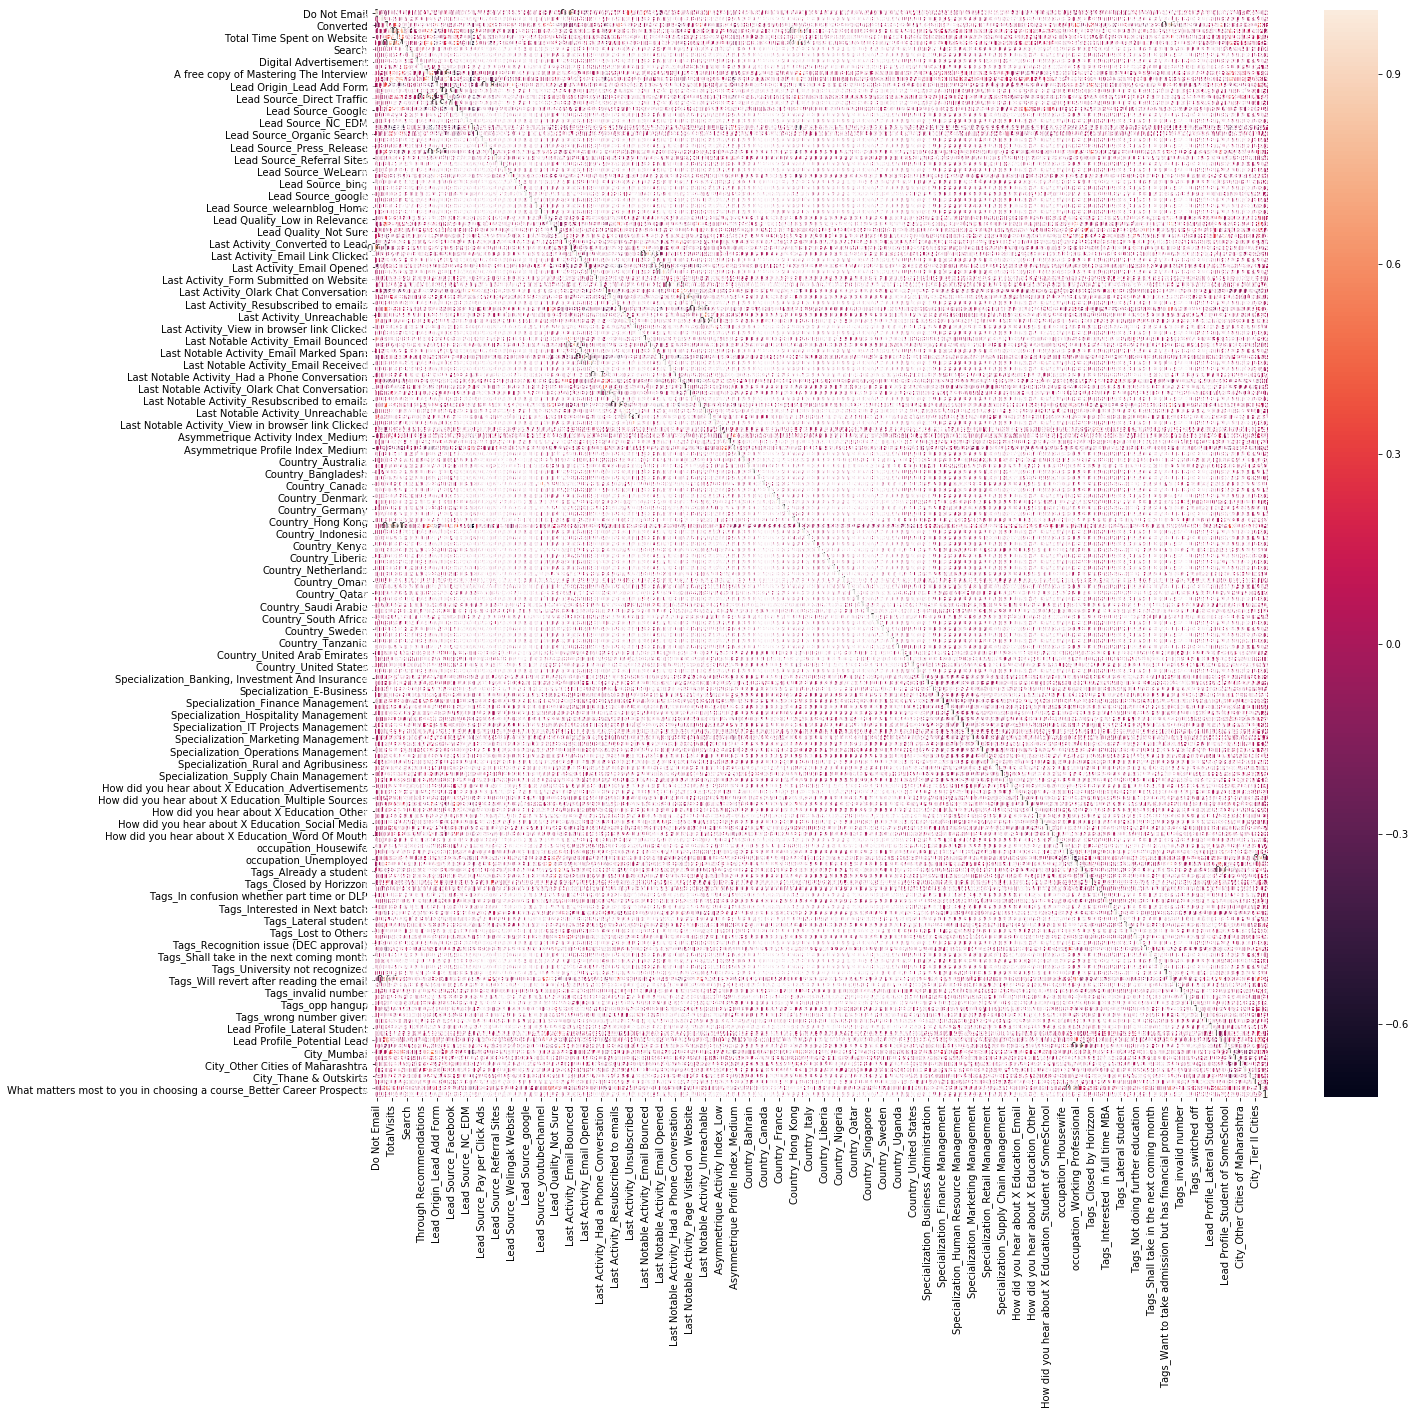

In [39]:
#checking correlation
plt.figure(figsize = (20,20))        # Size of the figure
sns.heatmap(lead_data1.corr(),annot = True)
plt.show()

# Some values are highly correalated so dropping it

In [40]:
X_train = X_train.drop(['Last Activity_SMS Sent','Last Activity_Email Opened','Lead Origin_Lead Add Form','Lead Source_Olark Chat','occupation_Unemployed'],axis = 1)
X_test = X_test.drop(['Last Activity_SMS Sent','Last Activity_Email Opened','Lead Origin_Lead Add Form','Lead Source_Olark Chat','occupation_Unemployed'],axis = 1)

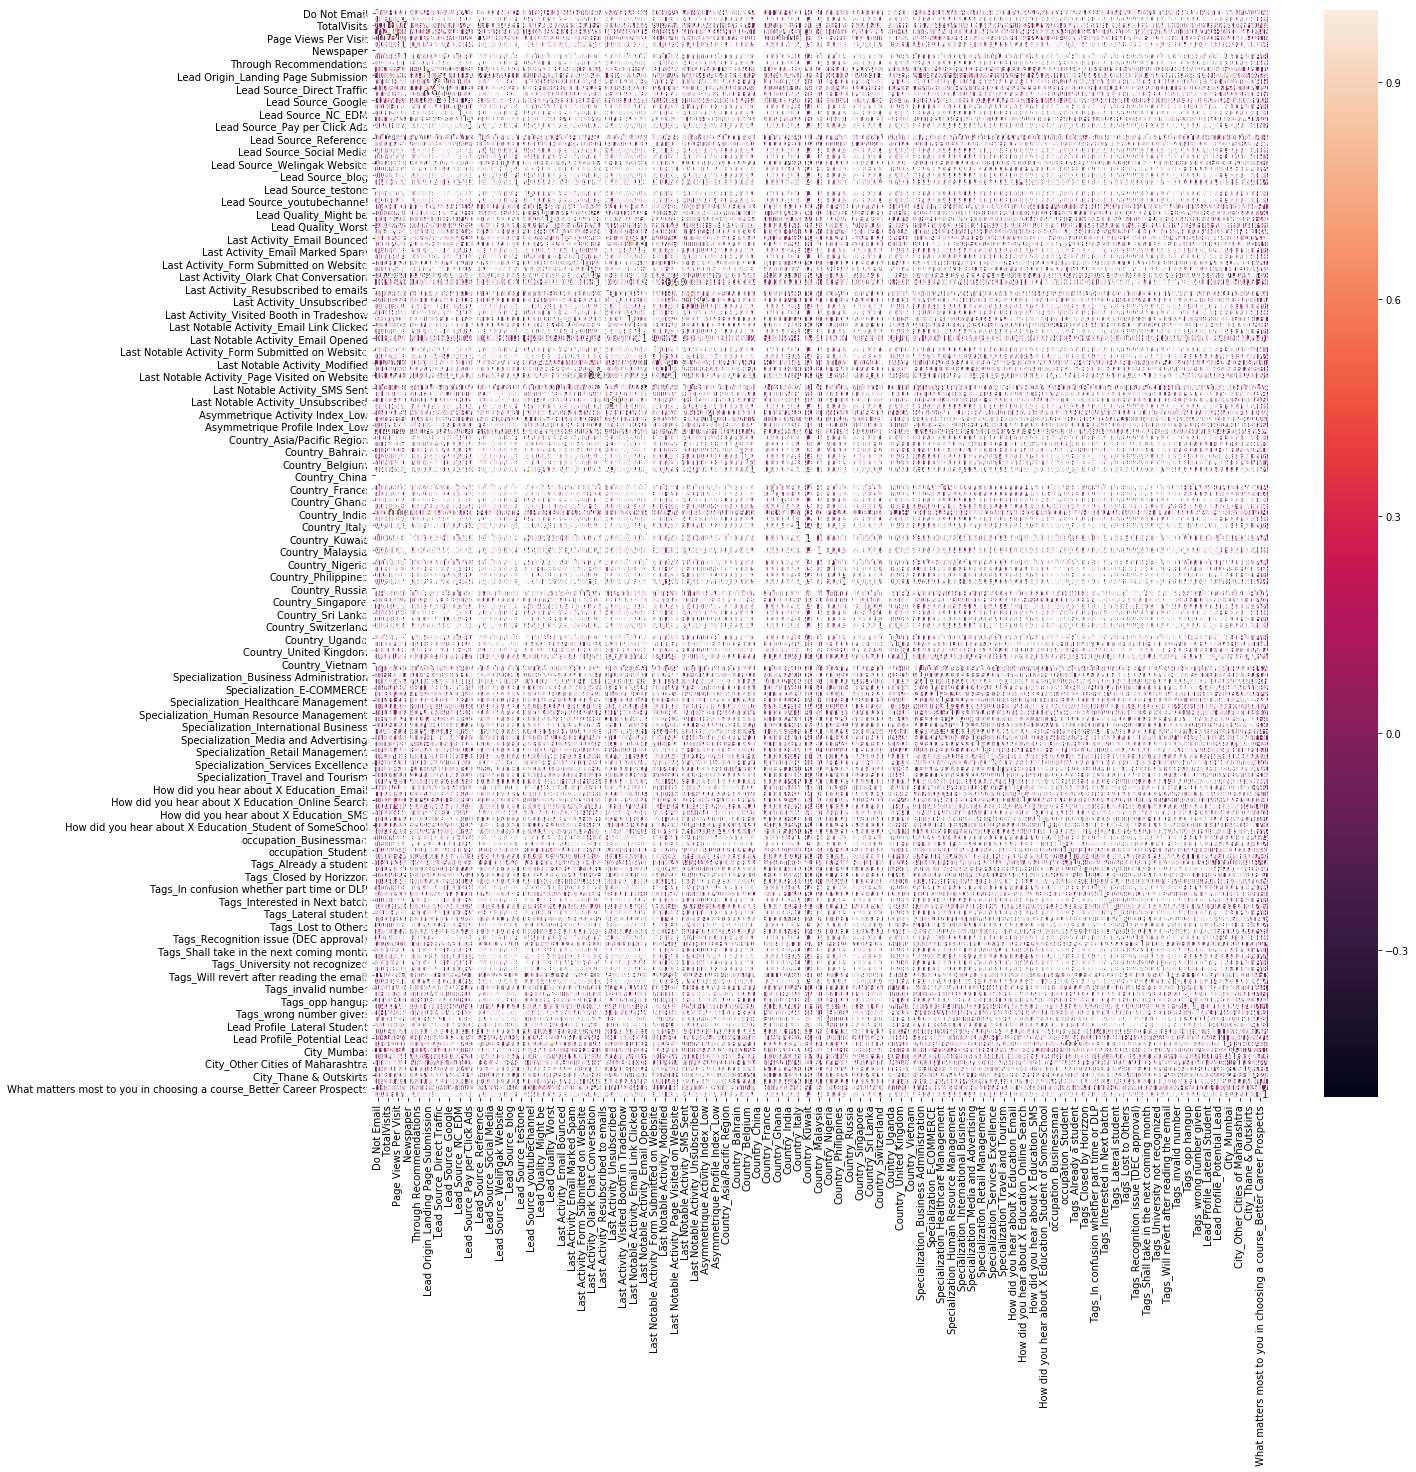

In [41]:
#againg checking correalation
plt.figure(figsize = (20,20))        # Size of the figure
sns.heatmap(X_train.corr(),annot = True)
plt.show()

as there is no correalated variable we will move ahead

# Model building
running first model

In [42]:
import statsmodels.api as sm

In [43]:
lead_log = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
lead_log.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 5931
Model:                            GLM   Df Residuals:                     5772
Model Family:                Binomial   Df Model:                          158
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                    nan
Date:                Sun, 09 Jun 2019   Deviance:                          nan
Time:                        17:43:18   Pearson chi2:                 2.85e+18
No. Iterations:                   100   Covariance Type:             nonrobust
===========================================================================================================================================
                                                                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------------------------------------
const                                                                    1.859e+14   1.04e+07   1.78e+07      0.000    1.86e+14    1.86e+14
Do Not Email                                                            -5.037e+14   4.77e+06  -1.06e+08      0.000   -5.04e+14   -5.04e+14
Do Not Call                                                              1.297e+15   6.79e+07   1.91e+07      0.000     1.3e+15     1.3e+15
TotalVisits                                                              7.408e+13   1.55e+06   4.77e+07      0.000    7.41e+13    7.41e+13
Total Time Spent on Website                                              3.824e+14    1.1e+06   3.49e+08      0.000    3.82e+14    3.82e+14
Page Views Per Visit                                                    -8.606e+13   1.67e+06  -5.16e+07      0.000   -8.61e+13   -8.61e+13
Search                                                                   7.585e+14   3.05e+07   2.48e+07      0.000    7.59e+14    7.59e+14
Newspaper                                                                  20.3638   4.36e-07   4.67e+07      0.000      20.364      20.364
Digital Advertisement                                                     -1.1e+14   4.84e+07  -2.27e+06      0.000    -1.1e+14    -1.1e+14
Through Recommendations                                                  2.973e+15   6.77e+07   4.39e+07      0.000    2.97e+15    2.97e+15
A free copy of Mastering The Interview                                  -9.949e+13   3.79e+06  -2.62e+07      0.000   -9.95e+13   -9.95e+13
Lead Origin_Landing Page Submission                                     -1.016e+14   4.71e+06  -2.16e+07      0.000   -1.02e+14   -1.02e+14
Lead Origin_Lead Import                                                  1.375e+15   5.01e+07   2.74e+07      0.000    1.38e+15    1.38e+15
Lead Source_Direct Traffic                                               -6.07e+13   7.39e+06  -8.22e+06      0.000   -6.07e+13   -6.07e+13
Lead Source_Facebook                                                    -2.286e+15   5.02e+07  -4.55e+07      0.000   -2.29e+15   -2.29e+15
Lead Source_Google                                                      -4.757e+13   6.98e+06  -6.82e+06      0.000   -4.76e+13   -4.76e+13
Lead Source_Live Chat                                                    3.251e+15   4.76e+07   6.82e+07      0.000    3.25e+15    3.25e+15
Lead Source_NC_EDM                                                        3.97e+15   6.85e+07   5.79e+07      0.000    3.97e+15    3.97e+15
Lead Source_Organic Search                                                3.09e+13    7.6e+06   4.07e+06      0.000    3.09e+13    3.09e+13
Lead Source_Pay per Click Ads                                           -2.358e+15

# Feature selection using RFE

In [44]:
#importing logistic regression
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

In [45]:
#imorting rfe
from sklearn.feature_selection import RFE
rfe = RFE(logreg, 20)             # running RFE with 20 variables as output
rfe = rfe.fit(X_train, y_train)

In [46]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('Do Not Email', False, 3),
 ('Do Not Call', False, 135),
 ('TotalVisits', False, 84),
 ('Total Time Spent on Website', False, 9),
 ('Page Views Per Visit', False, 85),
 ('Search', False, 16),
 ('Newspaper', False, 142),
 ('Digital Advertisement', False, 90),
 ('Through Recommendations', False, 127),
 ('A free copy of Mastering The Interview', False, 83),
 ('Lead Origin_Landing Page Submission', False, 17),
 ('Lead Origin_Lead Import', False, 74),
 ('Lead Source_Direct Traffic', False, 35),
 ('Lead Source_Facebook', False, 32),
 ('Lead Source_Google', False, 36),
 ('Lead Source_Live Chat', False, 132),
 ('Lead Source_NC_EDM', False, 14),
 ('Lead Source_Organic Search', False, 37),
 ('Lead Source_Pay per Click Ads', False, 139),
 ('Lead Source_Press_Release', False, 146),
 ('Lead Source_Reference', False, 10),
 ('Lead Source_Referral Sites', False, 73),
 ('Lead Source_Social Media', False, 96),
 ('Lead Source_WeLearn', False, 140),
 ('Lead Source_Welingak Website', True, 1),
 ('Lead So

In [47]:
#assining rfe support columns to a variable col
col = X_train.columns[rfe.support_]

In [48]:
X_train.columns[~rfe.support_]

Index(['Do Not Email', 'Do Not Call', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Search',
       'Newspaper', 'Digital Advertisement', 'Through Recommendations',
       'A free copy of Mastering The Interview',
       ...
       'Lead Profile_Other Leads', 'Lead Profile_Potential Lead',
       'Lead Profile_Student of SomeSchool', 'City_Mumbai',
       'City_Other Cities', 'City_Other Cities of Maharashtra',
       'City_Other Metro Cities', 'City_Thane & Outskirts',
       'City_Tier II Cities',
       'What matters most to you in choosing a course_Flexibility & Convenience'],
      dtype='object', length=154)

# Running the model with selected features

In [49]:
X_train_sm = sm.add_constant(X_train[col])
lead_logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = lead_logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 5931
Model:                            GLM   Df Residuals:                     5910
Model Family:                Binomial   Df Model:                           20
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1147.3
Date:                Sun, 09 Jun 2019   Deviance:                       2294.7
Time:                        17:43:31   Pearson chi2:                 8.59e+03
No. Iterations:                    23   Covariance Type:             nonrobust
=========================================================================================================================================
                                                                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------------------------------
const                                                                    -2.2847      0.094    -24.372      0.000      -2.468      -2.101
Lead Source_Welingak Website                                              3.5680      1.055      3.382      0.001       1.500       5.636
Lead Quality_Worst                                                       -2.3896      0.704     -3.393      0.001      -3.770      -1.009
Last Activity_Olark Chat Conversation                                    -1.4240      0.245     -5.819      0.000      -1.904      -0.944
Last Notable Activity_SMS Sent                                            2.5594      0.140     18.311      0.000       2.285       2.833
Asymmetrique Activity Index_Low                                          -2.4786      0.380     -6.517      0.000      -3.224      -1.733
Tags_Already a student                                                   -3.5094      0.600     -5.847      0.000      -4.686      -2.333
Tags_Closed by Horizzon                                                   5.2813      1.011      5.222      0.000       3.299       7.263
Tags_Graduation in progress                                              -2.1945      0.745     -2.946      0.003      -3.655      -0.734
Tags_Interested  in full time MBA                                        -2.9276      0.731     -4.007      0.000      -4.360      -1.496
Tags_Interested in other courses                                         -3.7262      0.469     -7.942      0.000      -4.646      -2.807
Tags_Lost to EINS                                                         5.3374      0.635      8.407      0.000       4.093       6.582
Tags_Not doing further education                                         -3.5919      1.020     -3.520      0.000      -5.592      -1.592
Tags_Ringing                                                             -5.1594      0.286    -18.071      0.000      -5.719      -4.600
Tags_Will revert after reading the email                                  3.0785      0.194     15.908      0.000       2.699       3.458
Tags_invalid number                                                      -4.7865      1.045     -4.580      0.000      -6.835      -2.738
Tags_number not provided                                                -25.7959    2.5e+04     -0.001      0.999   -4.91e+04     4.9e+04
Tags_opp hangup                                                          -4.3128      1.073     -4.019      0.000      -6.416      -2.210
Tags_switched off                                                        -5.9045      0.732     -8.071      0.000      -7.338      -4.471
Tags_wrong number given                                                 -25.7066   2.21e+04     -0.001      0.999   -4.34e+04 

column tags number not provided has high p value so its insignificant to model so  dropping it

In [50]:
col = col.drop('Tags_number not provided', 1)

# running the second model 

In [51]:
X_train_sm = sm.add_constant(X_train[col])
lead_logm3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = lead_logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 5931
Model:                            GLM   Df Residuals:                     5911
Model Family:                Binomial   Df Model:                           19
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1171.3
Date:                Sun, 09 Jun 2019   Deviance:                       2342.6
Time:                        17:43:31   Pearson chi2:                 8.37e+03
No. Iterations:                    22   Covariance Type:             nonrobust
=========================================================================================================================================
                                                                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------------------------------
const                                                                    -2.2574      0.092    -24.448      0.000      -2.438      -2.076
Lead Source_Welingak Website                                              3.6706      1.053      3.484      0.000       1.606       5.735
Lead Quality_Worst                                                       -2.5993      0.691     -3.764      0.000      -3.953      -1.246
Last Activity_Olark Chat Conversation                                    -1.4093      0.245     -5.763      0.000      -1.889      -0.930
Last Notable Activity_SMS Sent                                            2.4683      0.136     18.175      0.000       2.202       2.734
Asymmetrique Activity Index_Low                                          -2.4621      0.380     -6.486      0.000      -3.206      -1.718
Tags_Already a student                                                   -3.3865      0.598     -5.665      0.000      -4.558      -2.215
Tags_Closed by Horizzon                                                   5.3885      1.012      5.325      0.000       3.405       7.372
Tags_Graduation in progress                                              -2.0878      0.745     -2.803      0.005      -3.548      -0.628
Tags_Interested  in full time MBA                                        -2.8217      0.730     -3.863      0.000      -4.253      -1.390
Tags_Interested in other courses                                         -3.6185      0.468     -7.733      0.000      -4.536      -2.701
Tags_Lost to EINS                                                         5.3691      0.634      8.472      0.000       4.127       6.611
Tags_Not doing further education                                         -3.4680      1.019     -3.403      0.001      -5.466      -1.470
Tags_Ringing                                                             -4.9866      0.282    -17.679      0.000      -5.539      -4.434
Tags_Will revert after reading the email                                  3.1811      0.192     16.532      0.000       2.804       3.558
Tags_invalid number                                                      -4.6087      1.043     -4.418      0.000      -6.653      -2.564
Tags_opp hangup                                                          -4.1378      1.071     -3.865      0.000      -6.236      -2.039
Tags_switched off                                                        -5.7264      0.730     -7.844      0.000      -7.157      -4.295
Tags_wrong number given                                                 -24.5342   1.35e+04     -0.002      0.999   -2.64e+04    2.64e+04
What matters most to you in choosing a course_Better Career Prospects     2.0849      0.128     16.250      0.000       1.833 

variable tags wrong number given is insignifiicant to model so dropping it

In [52]:
col = col.drop('Tags_wrong number given', 1)

# Running the third model

In [53]:
X_train_sm = sm.add_constant(X_train[col])
lead_logm4 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = lead_logm4.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 5931
Model:                            GLM   Df Residuals:                     5912
Model Family:                Binomial   Df Model:                           18
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1198.2
Date:                Sun, 09 Jun 2019   Deviance:                       2396.4
Time:                        17:43:31   Pearson chi2:                 8.17e+03
No. Iterations:                     8   Covariance Type:             nonrobust
=========================================================================================================================================
                                                                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------------------------------
const                                                                    -2.2322      0.091    -24.523      0.000      -2.411      -2.054
Lead Source_Welingak Website                                              3.7875      1.052      3.602      0.000       1.727       5.848
Lead Quality_Worst                                                       -2.7258      0.671     -4.062      0.000      -4.041      -1.410
Last Activity_Olark Chat Conversation                                    -1.3998      0.244     -5.732      0.000      -1.878      -0.921
Last Notable Activity_SMS Sent                                            2.3836      0.132     18.073      0.000       2.125       2.642
Asymmetrique Activity Index_Low                                          -2.4374      0.380     -6.416      0.000      -3.182      -1.693
Tags_Already a student                                                   -3.2602      0.596     -5.467      0.000      -4.429      -2.091
Tags_Closed by Horizzon                                                   5.5085      1.012      5.441      0.000       3.524       7.493
Tags_Graduation in progress                                              -1.9721      0.745     -2.648      0.008      -3.432      -0.513
Tags_Interested  in full time MBA                                        -2.7045      0.730     -3.704      0.000      -4.135      -1.274
Tags_Interested in other courses                                         -3.4976      0.467     -7.493      0.000      -4.413      -2.583
Tags_Lost to EINS                                                         5.4049      0.633      8.543      0.000       4.165       6.645
Tags_Not doing further education                                         -3.3412      1.019     -3.281      0.001      -5.337      -1.345
Tags_Ringing                                                             -4.8043      0.279    -17.238      0.000      -5.351      -4.258
Tags_Will revert after reading the email                                  3.2990      0.191     17.256      0.000       2.924       3.674
Tags_invalid number                                                      -4.4271      1.041     -4.251      0.000      -6.468      -2.386
Tags_opp hangup                                                          -3.9549      1.068     -3.702      0.000      -6.049      -1.861
Tags_switched off                                                        -5.5392      0.729     -7.603      0.000      -6.967      -4.111
What matters most to you in choosing a course_Better Career Prospects     1.9468      0.125     15.544      0.000       1.701       2.192
==============================================================================================================================

In [54]:
#getting predicted value on y train dataset
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

4329    0.096893
5793    0.995491
435     0.006122
8958    0.028041
4266    0.537776
3766    0.096893
1377    0.953182
3834    0.096893
7558    0.096893
1913    0.890729
dtype: float64

In [55]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.09689325, 0.99549104, 0.00612209, 0.02804123, 0.53777639,
       0.09689325, 0.95318229, 0.09689325, 0.09689325, 0.89072932])

# creating a dataframe with actual converted tag , predicted probabilities and also lead score

# we will  create new metrics lead score by multiplying 100 into conversion probabilities

In [56]:
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_Prob':y_train_pred})
y_train_pred_final['Lead Number'] = lead_data['Lead Number']
y_train_pred_final['Lead Score'] = y_train_pred_final['Converted_Prob'] * 100
y_train_pred_final['Lead Score'] = y_train_pred_final['Lead Score'].apply(lambda x:round(x,2))
y_train_pred_final.head()

Converted  Converted_Prob  Lead Number  Lead Score
0          1        0.096893       660737        9.69
1          1        0.995491       660728       99.55
2          0        0.006122       660727        0.61
3          0        0.028041       660719        2.80
4          1        0.537776       660681       53.78

# now checking cutoffs for probability

In [57]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

Converted  Converted_Prob  Lead Number  Lead Score  0.0  0.1  0.2  0.3  \
0          1        0.096893       660737        9.69    1    0    0    0   
1          1        0.995491       660728       99.55    1    1    1    1   
2          0        0.006122       660727        0.61    1    0    0    0   
3          0        0.028041       660719        2.80    1    0    0    0   
4          1        0.537776       660681       53.78    1    1    1    1   

   0.4  0.5  0.6  0.7  0.8  0.9  
0    0    0    0    0    0    0  
1    1    1    1    1    1    1  
2    0    0    0    0    0    0  
3    0    0    0    0    0    0  
4    1    1    0    0    0    0

In [58]:
#calculating accuracy sesnsitivity and specificity for various cutoffs
from sklearn import metrics
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.375653  1.000000  0.000000
0.1   0.1  0.917552  0.941652  0.903052
0.2   0.2  0.920081  0.934470  0.911423
0.3   0.3  0.920081  0.934470  0.911423
0.4   0.4  0.920418  0.934470  0.911963
0.5   0.5  0.921598  0.864452  0.955982
0.6   0.6  0.912494  0.807451  0.975695
0.7   0.7  0.910976  0.802513  0.976235
0.8   0.8  0.911145  0.802513  0.976506
0.9   0.9  0.886023  0.713645  0.989738


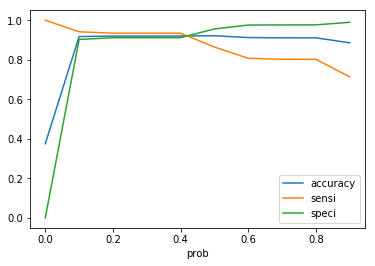

In [59]:
# plotting accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

# from above curve optimal cutoff is 0.4

In [60]:
y_train_pred_final['predicted'] = y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.4 else 0)

# Let's see the head
y_train_pred_final.head()


Converted  Converted_Prob  Lead Number  Lead Score  0.0  0.1  0.2  0.3  \
0          1        0.096893       660737        9.69    1    0    0    0   
1          1        0.995491       660728       99.55    1    1    1    1   
2          0        0.006122       660727        0.61    1    0    0    0   
3          0        0.028041       660719        2.80    1    0    0    0   
4          1        0.537776       660681       53.78    1    1    1    1   

   0.4  0.5  0.6  0.7  0.8  0.9  predicted  
0    0    0    0    0    0    0          0  
1    1    1    1    1    1    1          1  
2    0    0    0    0    0    0          0  
3    0    0    0    0    0    0          0  
4    1    1    0    0    0    0          1

In [61]:
# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
print(confusion)

[[3377  326]
 [ 146 2082]]


In [62]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

0.9204181419659416


# now checking vif's

In [63]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [64]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
11                   Tags_Not doing further education  1.32
6                             Tags_Closed by Horizzon  1.25
16                                  Tags_switched off  1.22
7                         Tags_Graduation in progress  1.19
8                   Tags_Interested  in full time MBA  1.16
4                     Asymmetrique Activity Index_Low  1.13
0                        Lead Source_Welingak Website  1.09
14                                Tags_invalid number  1.09
10                                  Tags_Lost to EINS  1.08
15                                    Tags_opp hangup  1.03
1                                  Lead Quality_Worst  0.72
12                                       Tags_Ringing  0.67
9                    Tags_Interested in other courses  0.36
5                              Tags_Already a student  0.34
2               Last Activity_Olark Chat Conversation  0.23
3                      Last Notable Activity_SMS Sent  0.18
13           Tags_Will revert after reading the email  0.12
17  What matters most to you in choosing a course_...  0.07

all variable has good vif so need not to drop

# Metrics beyond simple accuracy

In [65]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [66]:
#checking sensitivity
TP / float(TP+FN)

0.9344703770197487

In [67]:
#checking specificity
TN / float(TN+FP)

0.9119632730218742

In [68]:
#false positive rate
print(FP/ float(TN+FP))

0.08803672697812584


In [69]:
# positive predictive value 
print (TP / float(TP+FP))

0.8646179401993356


In [70]:
# Negative predictive value
print (TN / float(TN+ FN))

0.9585580471189328


# plotting the roc curve

In [71]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [72]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Converted_Prob, drop_intermediate = False )

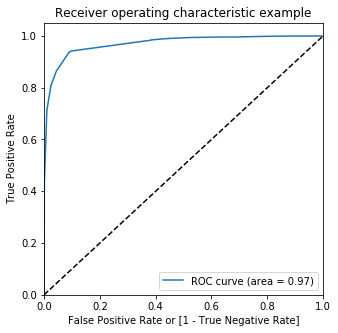

In [73]:
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Converted_Prob)

a good roc curve has been drawn 

# Precision and Recall

In [74]:
#checking confusion matrics
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
confusion

array([[3377,  326],
       [ 146, 2082]], dtype=int64)

In [75]:
#checking precision
confusion[1,1]/(confusion[0,1]+confusion[1,1])

0.8646179401993356

In [76]:
#checking recall
confusion[1,1]/(confusion[1,0]+confusion[1,1])

0.9344703770197487

In [77]:
from sklearn.metrics import precision_score, recall_score

In [78]:
precision_score

<function sklearn.metrics.classification.precision_score(y_true, y_pred, labels=None, pos_label=1, average='binary', sample_weight=None)>

In [79]:
precision_score(y_train_pred_final.Converted, y_train_pred_final.predicted)

0.8646179401993356

In [80]:
recall_score(y_train_pred_final.Converted, y_train_pred_final.predicted)

0.9344703770197487

# Precision and recall tradeoff

In [81]:
from sklearn.metrics import precision_recall_curve

In [82]:
y_train_pred_final.Converted, y_train_pred_final.predicted

(0       1
 1       1
 2       0
 3       0
 4       1
 5       0
 6       1
 7       0
 8       0
 9       1
 10      1
 11      0
 12      0
 13      0
 14      0
 15      1
 16      1
 17      1
 18      0
 19      1
 20      0
 21      0
 22      1
 23      1
 24      0
 25      1
 26      0
 27      0
 28      0
 29      0
        ..
 5901    0
 5902    0
 5903    0
 5904    1
 5905    0
 5906    0
 5907    0
 5908    0
 5909    0
 5910    0
 5911    0
 5912    1
 5913    1
 5914    1
 5915    0
 5916    1
 5917    0
 5918    0
 5919    1
 5920    1
 5921    1
 5922    1
 5923    1
 5924    0
 5925    0
 5926    0
 5927    0
 5928    0
 5929    0
 5930    0
 Name: Converted, Length: 5931, dtype: int64, 0       0
 1       1
 2       0
 3       0
 4       1
 5       0
 6       1
 7       0
 8       0
 9       1
 10      1
 11      0
 12      0
 13      0
 14      0
 15      1
 16      1
 17      1
 18      0
 19      1
 20      0
 21      0
 22      1
 23      1
 24      0
 25      

In [83]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Converted_Prob)

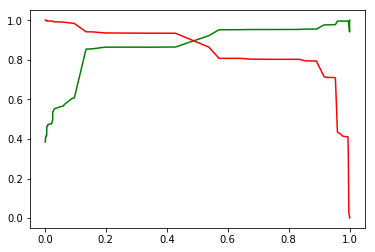

In [84]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

# making prediction on test set

In [85]:
#scaling variables
X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.transform(X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']]) 

In [86]:
X_test = X_test[col]
X_test.head()

Lead Source_Welingak Website  Lead Quality_Worst  \
7709                             0                   0   
7125                             0                   0   
6403                             0                   0   
357                              0                   0   
9082                             0                   1   

      Last Activity_Olark Chat Conversation  Last Notable Activity_SMS Sent  \
7709                                      0                               0   
7125                                      0                               1   
6403                                      0                               0   
357                                       0                               0   
9082                                      0                               0   

      Asymmetrique Activity Index_Low  Tags_Already a student  \
7709                                0                       0   
7125                                0                       0   
6403                                0                       0   
357                                 0                       0   
9082                                0                       0   

      Tags_Closed by Horizzon  Tags_Graduation in progress  \
7709                        0                            0   
7125                        0                            0   
6403                        0                            0   
357                         0                            0   
9082                        0                            0   

      Tags_Interested  in full time MBA  Tags_Interested in other courses  \
7709                                  0                                 0   
7125                                  0                                 0   
6403                                  0                                 0   
357                                   0                                 0   
9082                                  0                                 0   

      Tags_Lost to EINS  Tags_Not doing further education  Tags_Ringing  \
7709                  0                                 0             0   
7125                  0                                 0             0   
6403                  0                                 0             0   
357                   0                                 0             1   
9082                  0                                 1             0   

      Tags_Will revert after reading the email  Tags_invalid number  \
7709                                         0                    1   
7125                                         1                    0   
6403                                         0                    0   
357                                          0                    0   
9082                                         0                    0   

      Tags_opp hangup  Tags_switched off  \
7709                0                  0   
7125                0                  0   
6403                0                  0   
357                 0                  0   
9082                0                  0   

      What matters most to you in choosing a course_Better Career Prospects  
7709                                                  1                      
7125                                                  1                      
6403                                                  0                      
357                                                   1                      
9082                                                  1

In [87]:
X_test_sm = sm.add_constant(X_test)

In [88]:
#making prediction on test set
y_test_pred = res.predict(X_test_sm)

In [89]:
y_test_pred[:10]

7709    0.008902
7125    0.995491
6403    0.096893
357     0.006122
9082    0.001739
1434    0.429127
3943    0.005581
1785    0.001984
8551    0.953182
557     0.096893
dtype: float64

In [90]:
#converting y_pred to dataframe
y_pred_1 = pd.DataFrame(y_test_pred)

In [91]:
y_pred_1.head()

0
7709  0.008902
7125  0.995491
6403  0.096893
357   0.006122
9082  0.001739

In [92]:
#converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

In [93]:
#putting lead number to index
y_test_df['Lead Number'] = lead_data['Lead Number']

In [94]:
#resetting index 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [95]:
#concatanating both dataframe
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [96]:
y_pred_final.head()

Converted  Lead Number         0
0          0       590700  0.008902
1          1       594833  0.995491
2          0       600817  0.096893
3          0       656621  0.006122
4          0       580732  0.001739

In [97]:
#assinging 0 to col name converted prob
y_pred_final= y_pred_final.rename(columns={ 0 : 'Converted_Prob'})

In [99]:
#renaming the column name
y_pred_final = y_pred_final.reindex_axis(['Lead Number','Converted','Converted_Prob'], axis=1)

In [100]:
y_pred_final.head()

Lead Number  Converted  Converted_Prob
0       590700          0        0.008902
1       594833          1        0.995491
2       600817          0        0.096893
3       656621          0        0.006122
4       580732          0        0.001739

# predicting on test dataset with optimal cutoff off 0.42 from precision and recall tradeoff curve

# Calculating lead score on test dataset

In [101]:
y_pred_final['final_predicted'] = y_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.42 else 0)
y_pred_final['Lead_score'] = y_pred_final['Converted_Prob'] * 100
y_pred_final['Lead_score'] = y_pred_final['Lead_score'].apply(lambda x:round(x,2))

In [102]:
y_pred_final.head()

Lead Number  Converted  Converted_Prob  final_predicted  Lead_score
0       590700          0        0.008902                0        0.89
1       594833          1        0.995491                1       99.55
2       600817          0        0.096893                0        9.69
3       656621          0        0.006122                0        0.61
4       580732          0        0.001739                0        0.17

In [103]:
#checking accuracy
metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_predicted)

0.92410538733779

In [104]:
#confusion matrix
confusion2 = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.final_predicted )
confusion2

array([[1453,  127],
       [  66,  897]], dtype=int64)

In [105]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [106]:
#check sensitivity of test dataset
TP / float(TP+FN)

0.9314641744548287

In [107]:
#checking specificity of test dataset
TN / float(TN+FP)

0.919620253164557